In [1]:
import sys
import os
from pprint import pprint


current_dir = os.path.dirname(os.path.realpath(os.getcwd()))
different_path = os.path.abspath(os.path.join(current_dir, '../'))
sys.path.append(current_dir)

from modules.graphs import build_graph, graph_names
from modules.query_resolver import query_resolver
from modules.queries import queries

In [2]:
import psycopg2
import psycopg2.extras

from urllib.parse import urlparse
import os
from decouple import AutoConfig
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
config = AutoConfig(search_path=parent_directory)
url = urlparse(config("db_url"))
connection = psycopg2.connect(
    host=url.hostname,
    port=url.port,
    database=url.path[1:],
    user=url.username,
    password=url.password
)
cursor = connection.cursor(cursor_factory = psycopg2.extras.RealDictCursor)

In [3]:
result = query_resolver(cursor, queries, "list_guilds")
guild_id = result.iloc[0]["guild_id"]
print(f"guild_id = {guild_id}")

guild_id = 708407473832329227


In [4]:
result = query_resolver(cursor, queries, "guild_author_most_reactions", {"guild_id" : guild_id })
author_id = result.iloc[0]["author_guild_id"]
print(f"author_id = {author_id}")

author_id = 708391213450920057-708407473832329227


user_longest_avg_msg_length


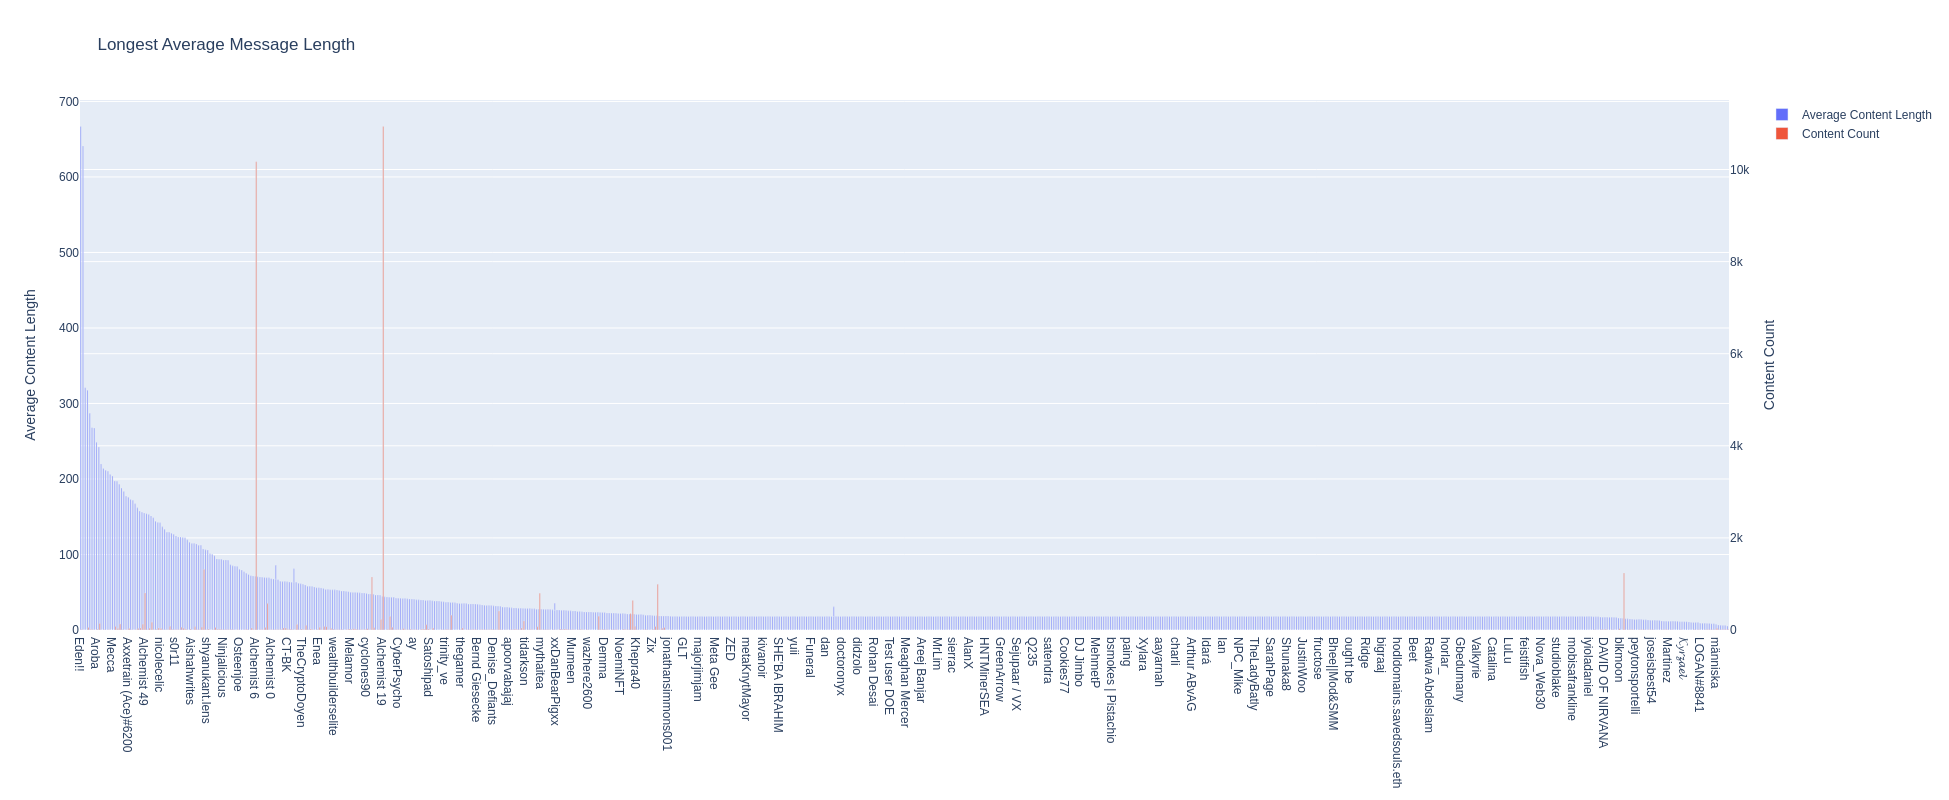

guild_author_most_messages


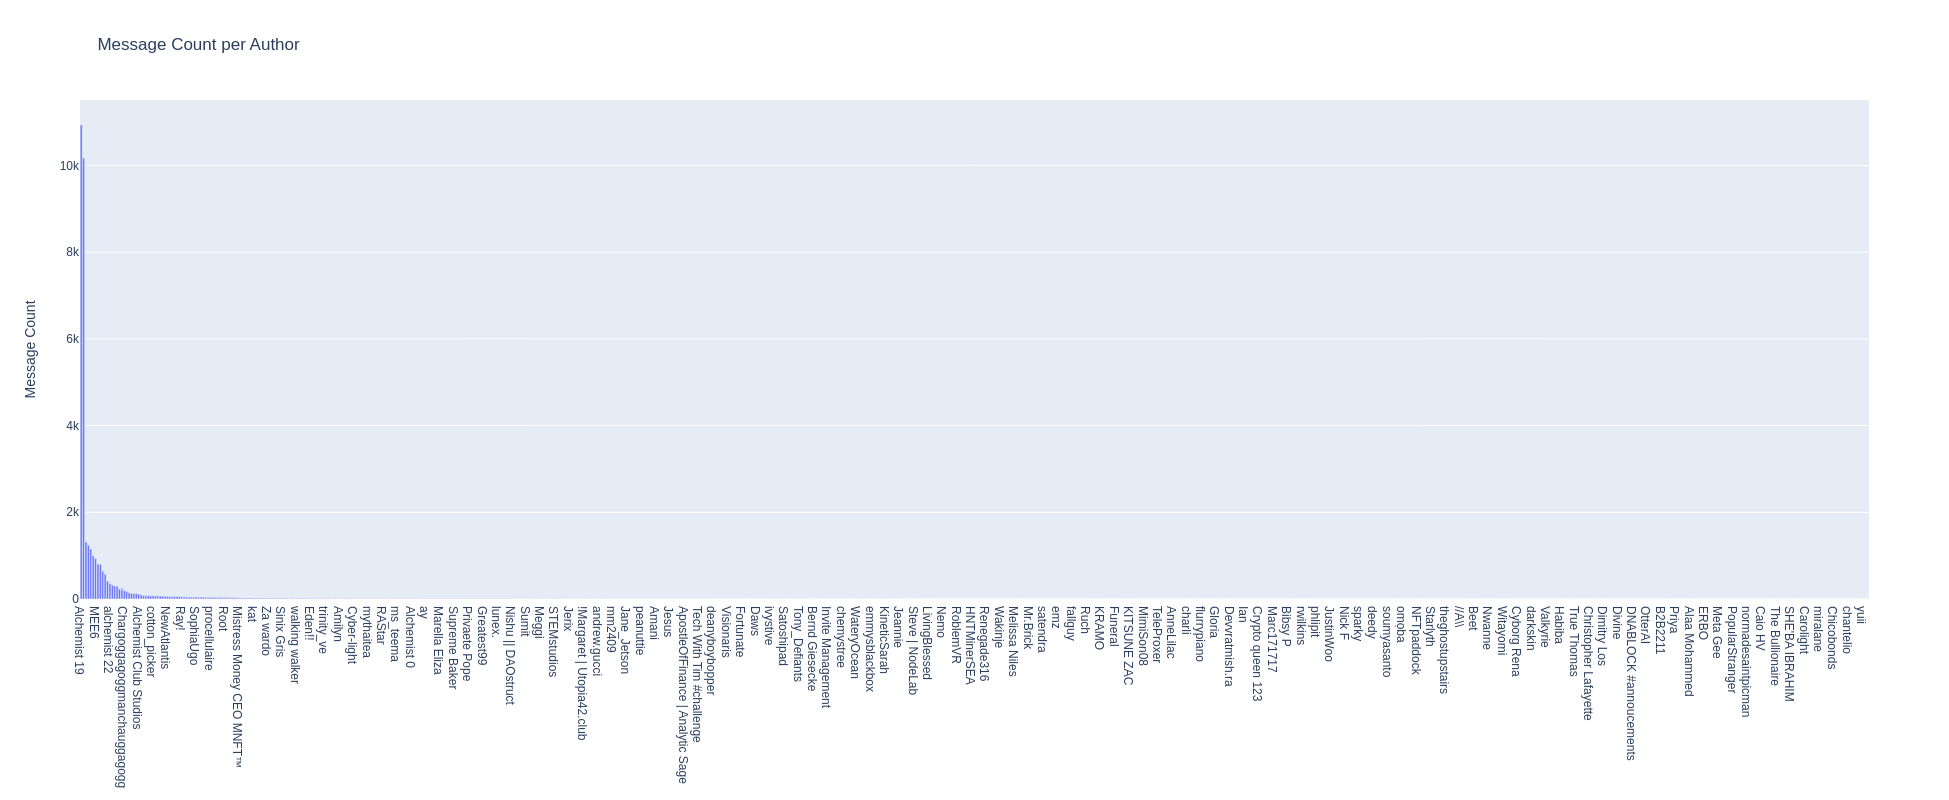

guild_author_most_days_with_messages


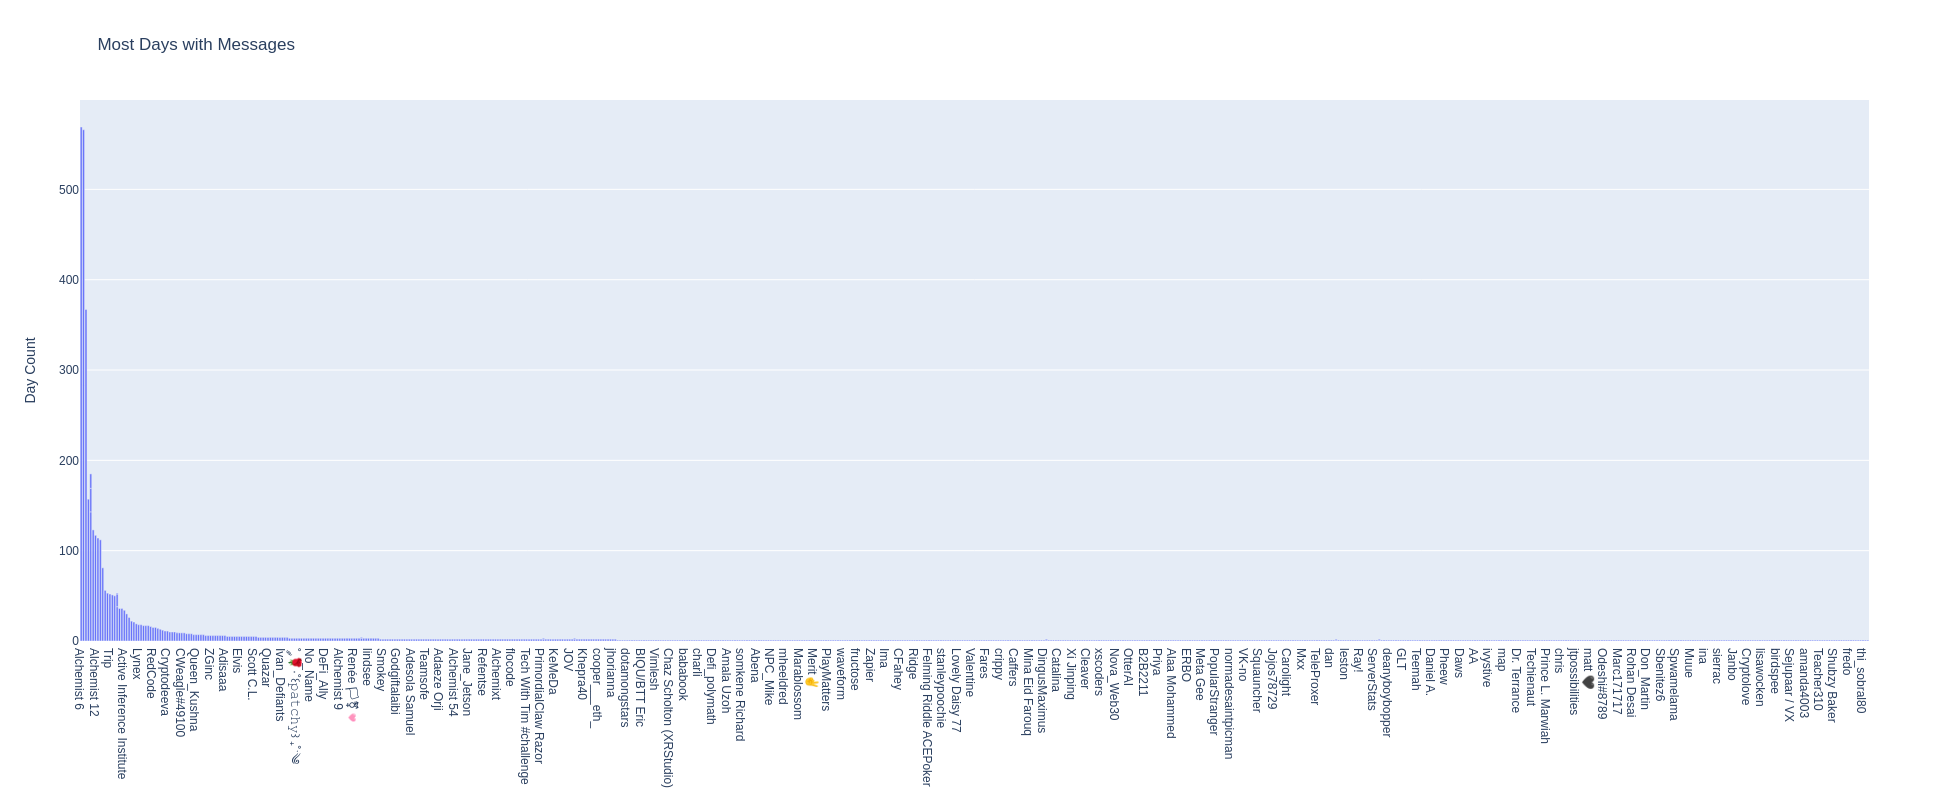

guild_author_most_reactions


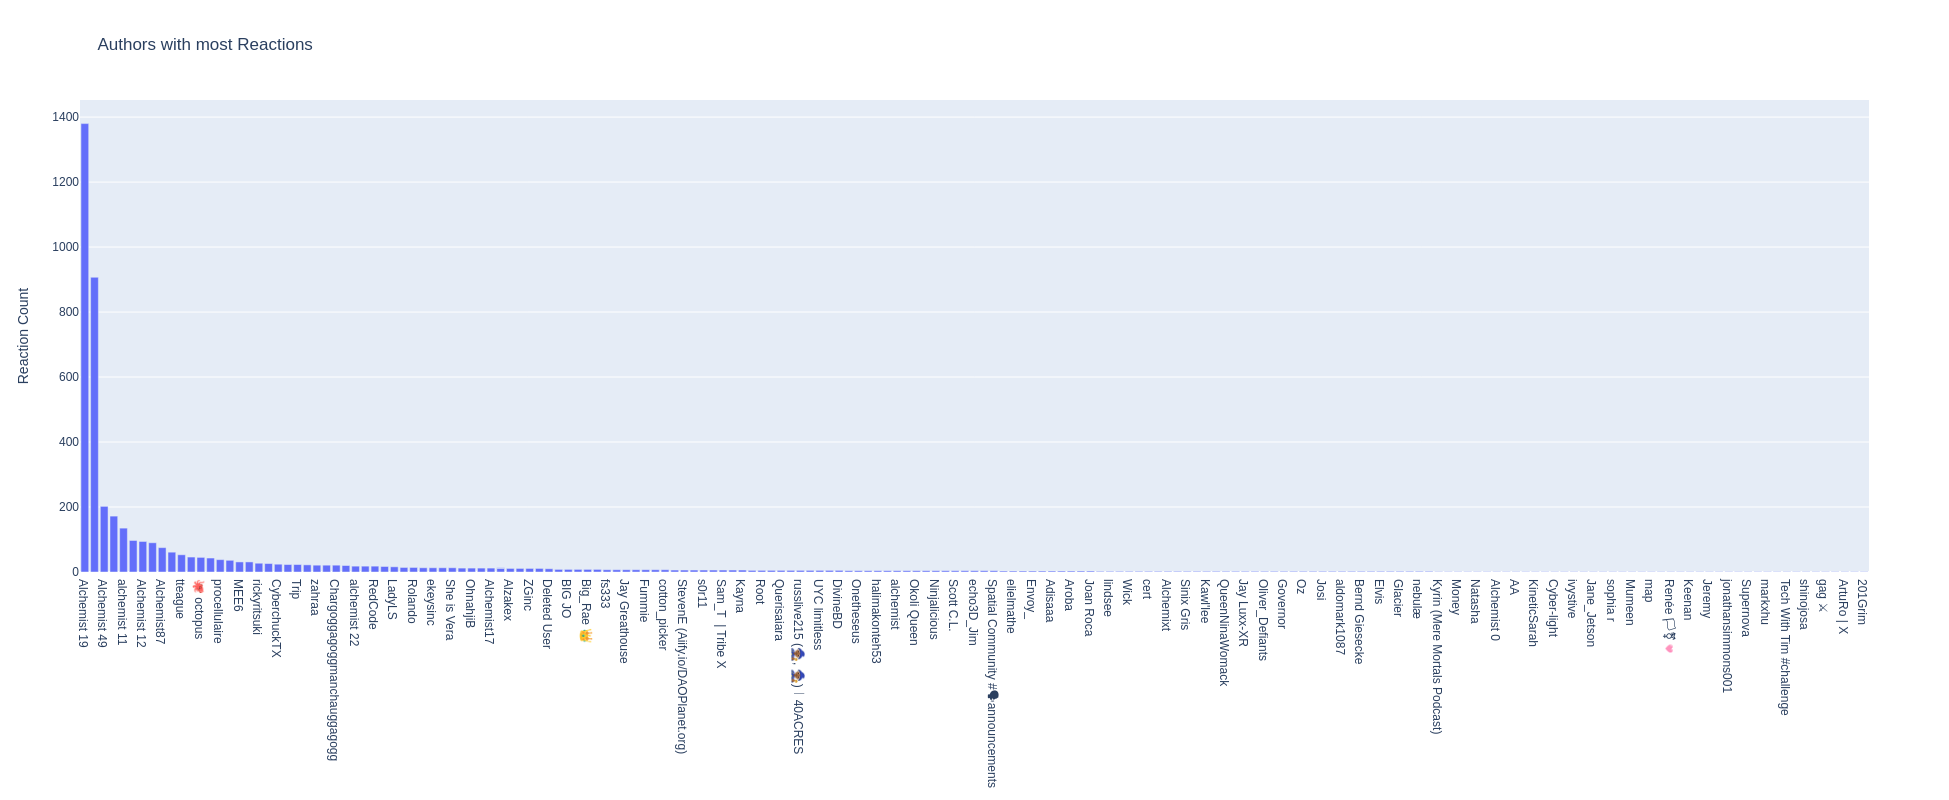

guild_author_distinct_reaction_count


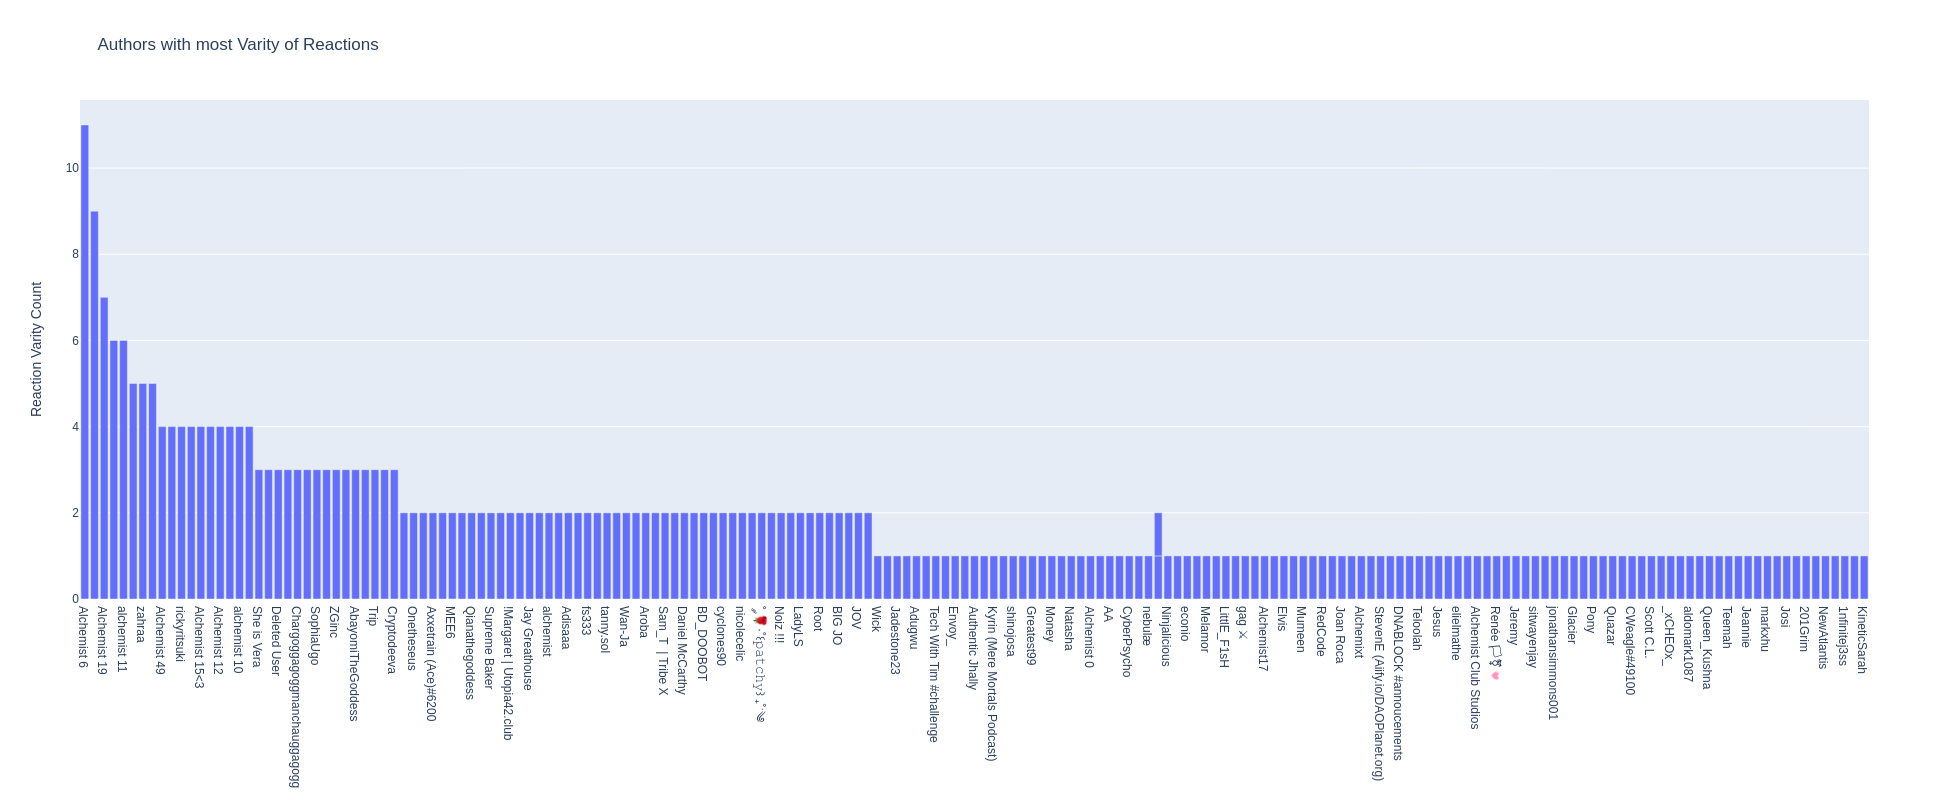

guild_author_most_messages_single_day


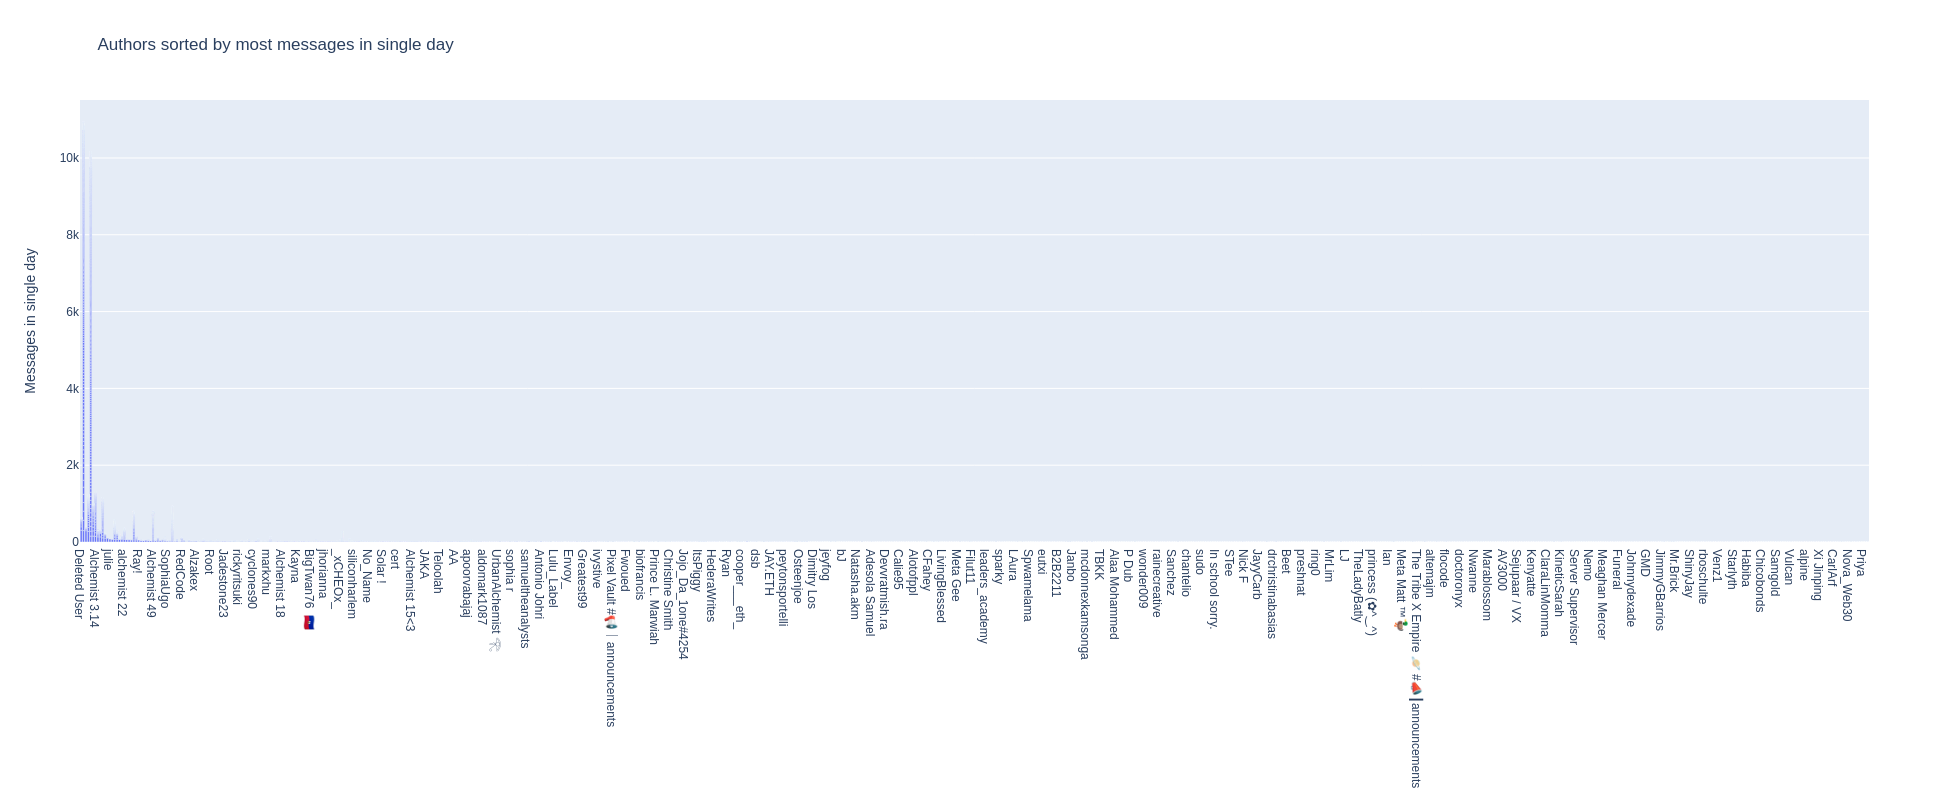

guild_author_most_attachments


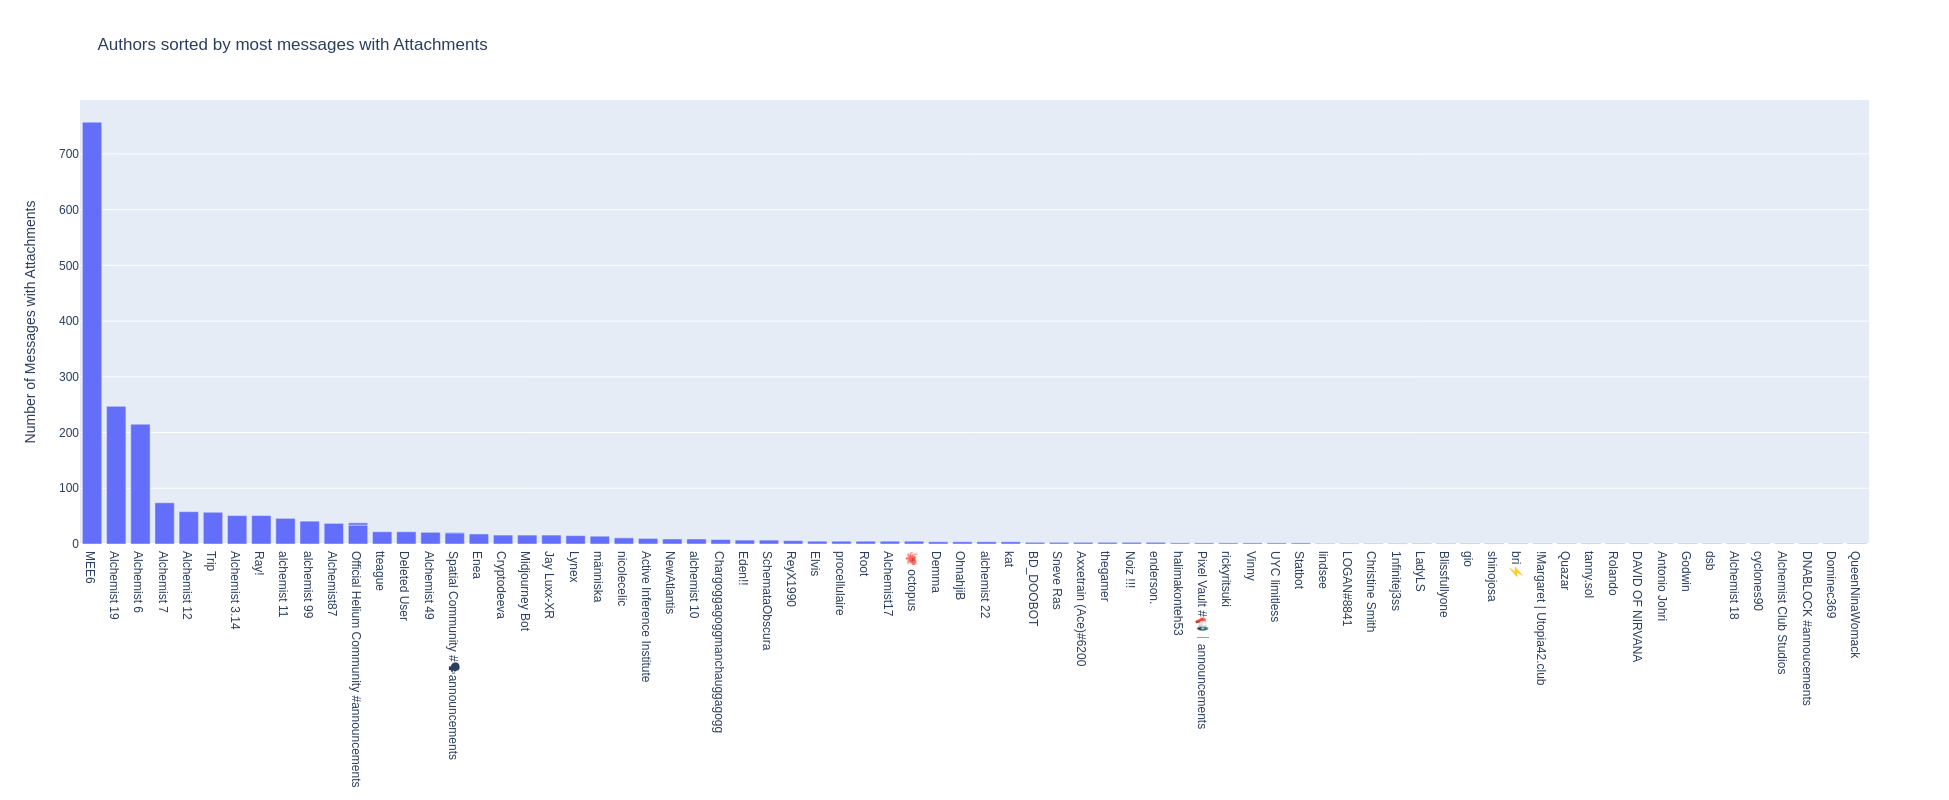

guild_author_edit_percentage


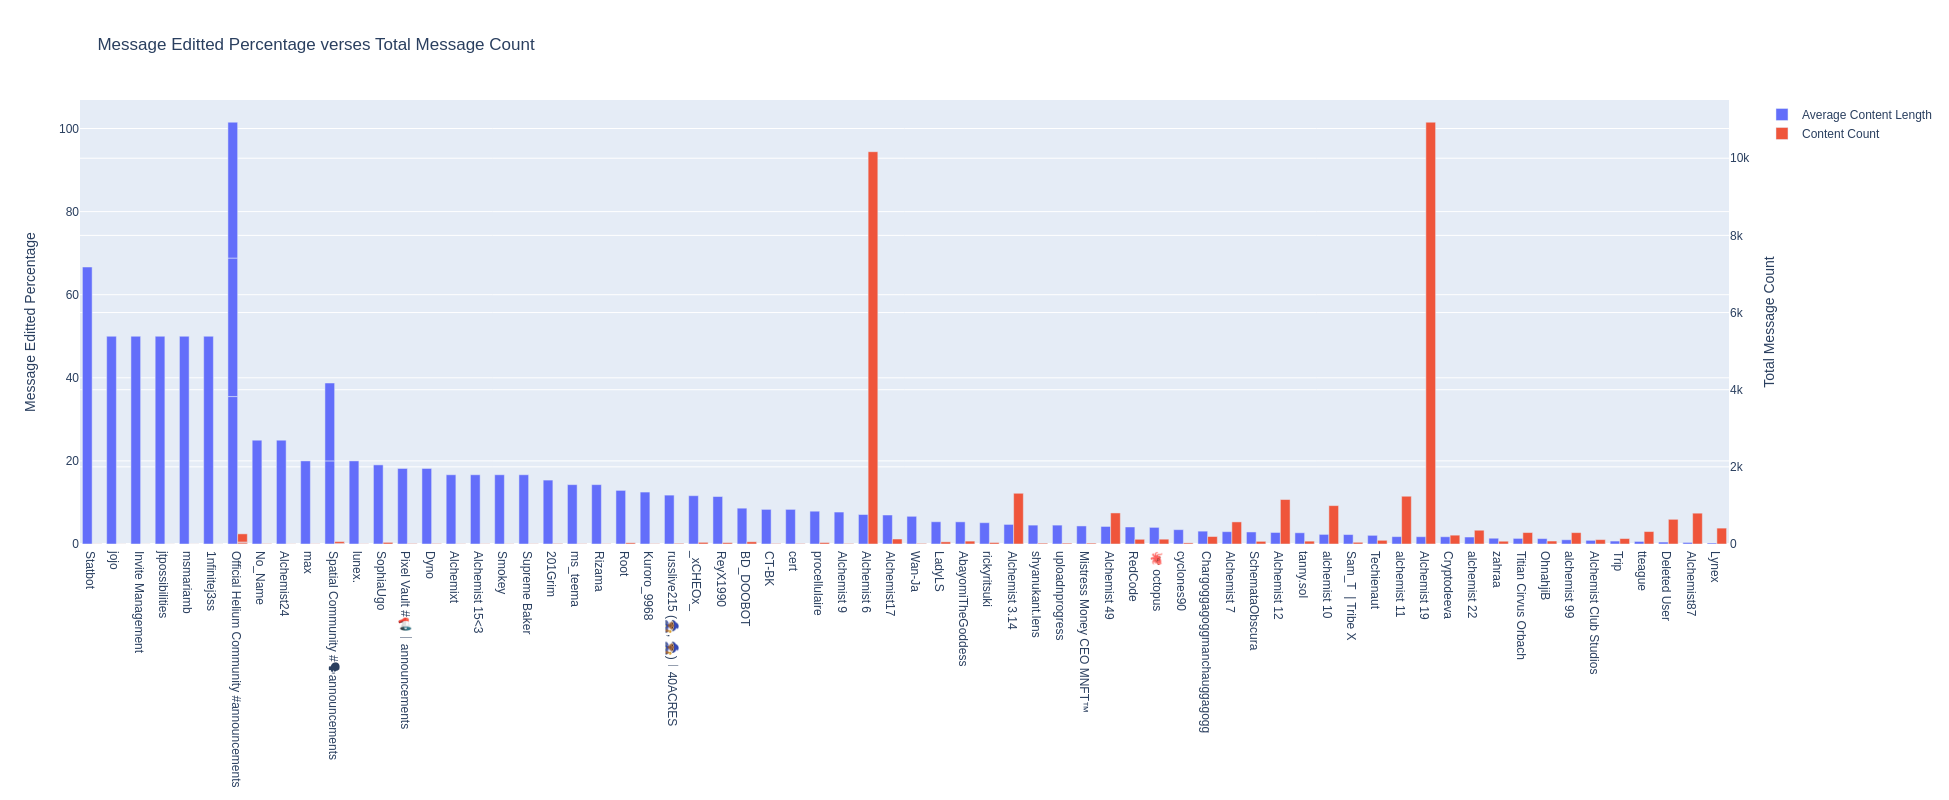

count_messages_per_channel_for_user_in_guild


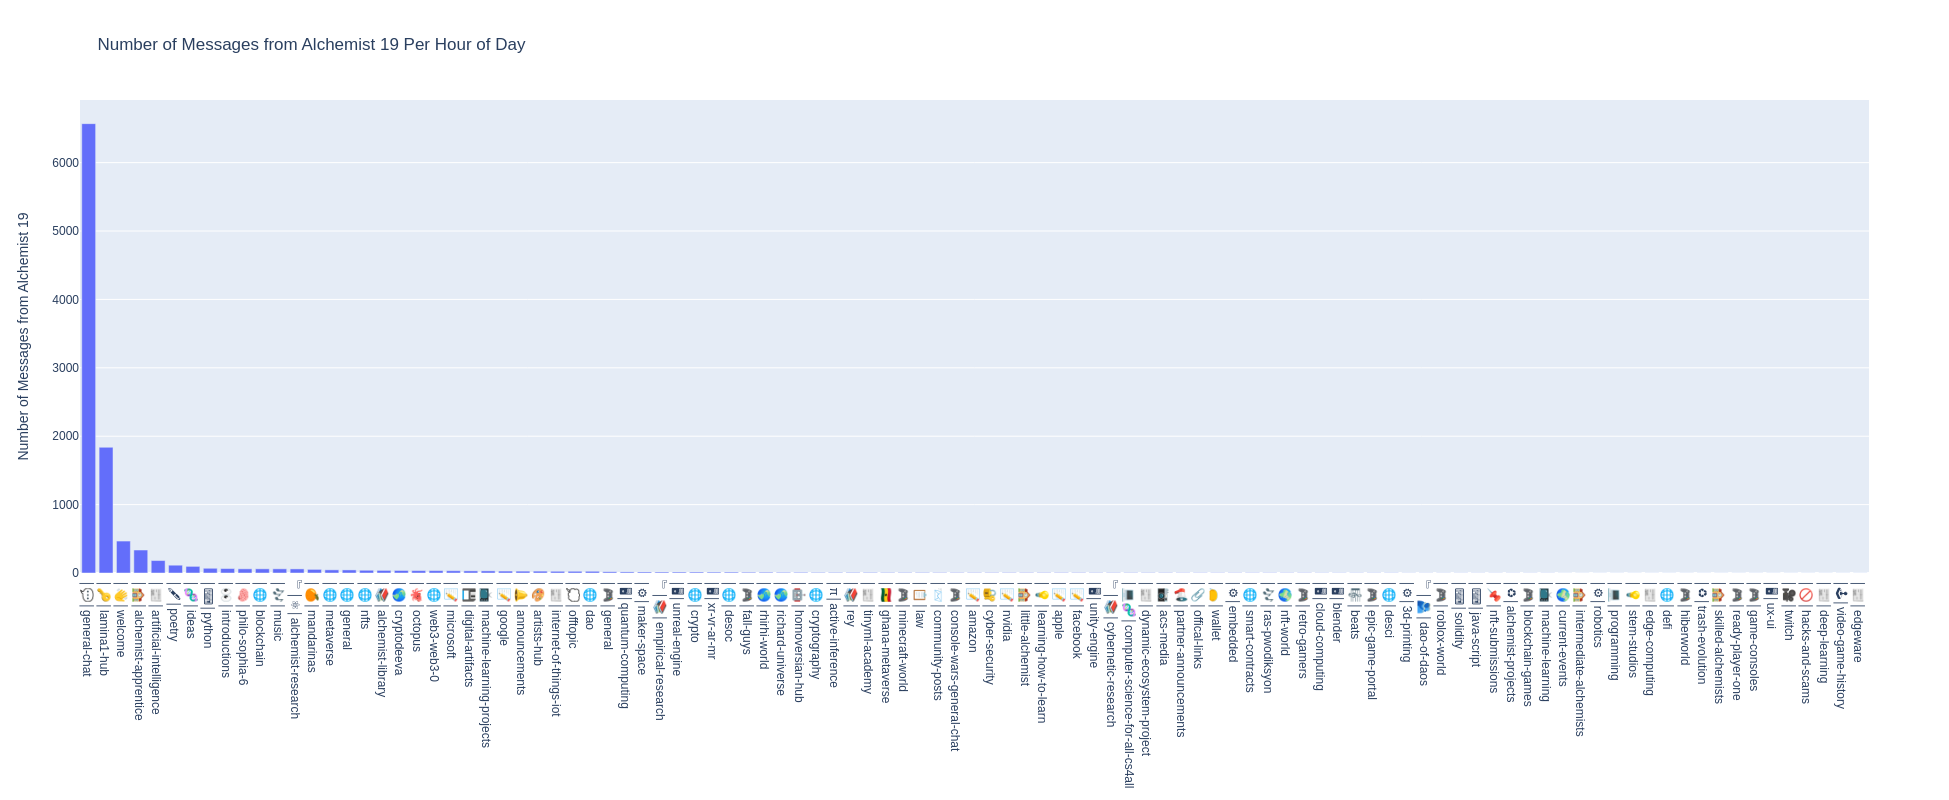

guild_author_most_reacted_messages


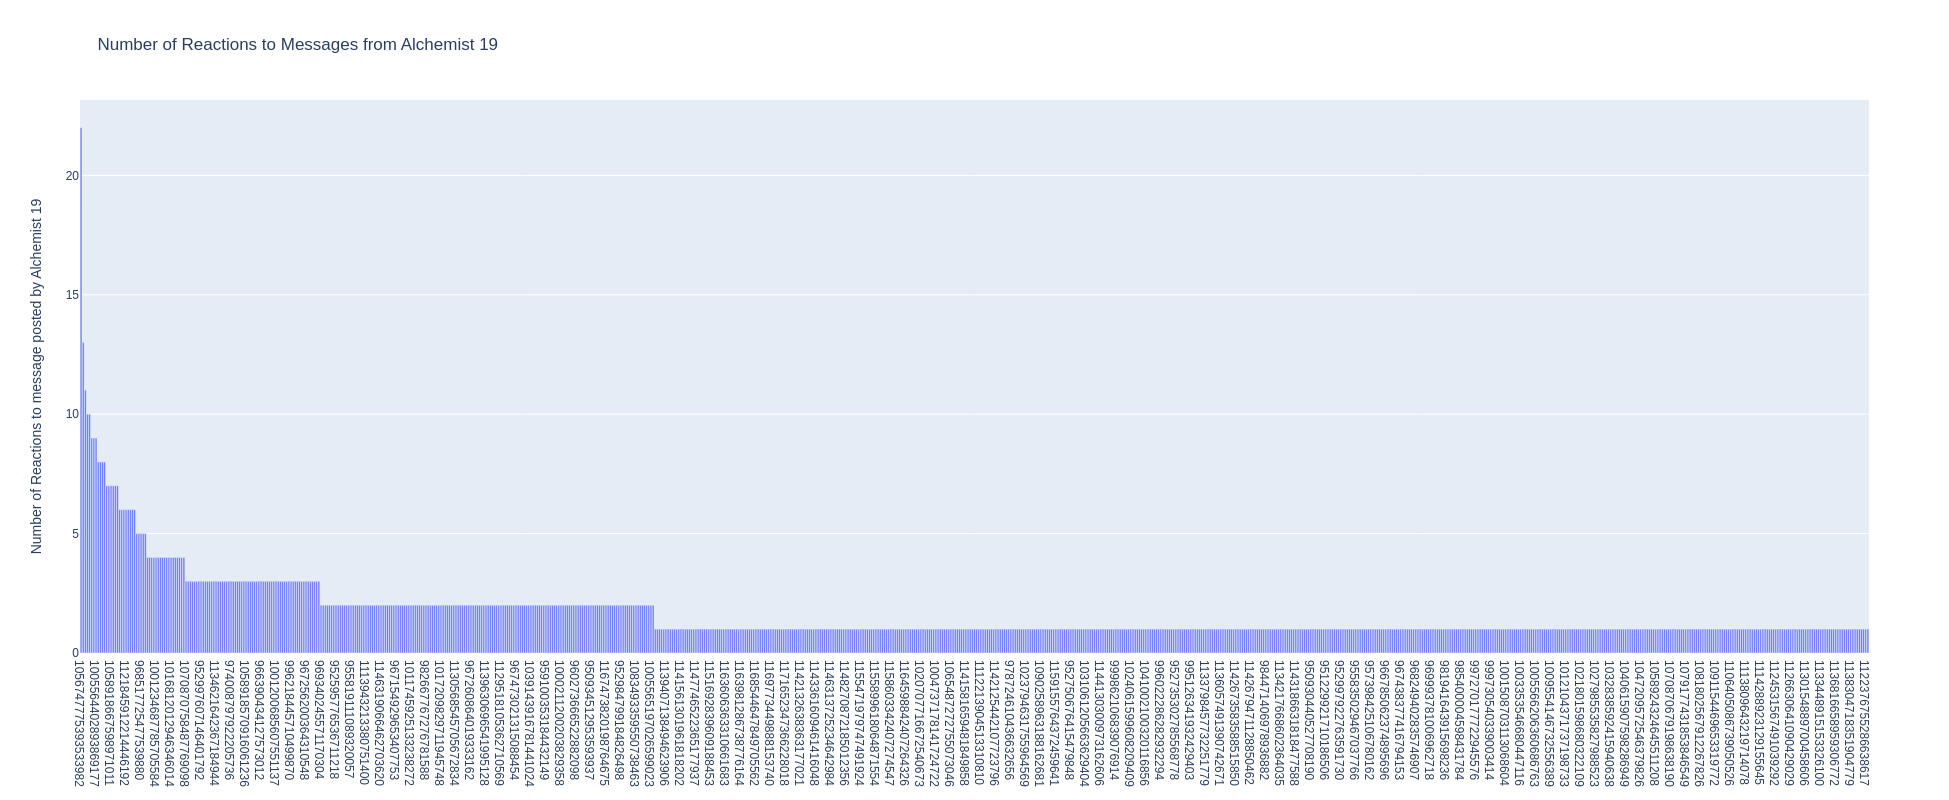

guild_author_messages_by_hour_of_day


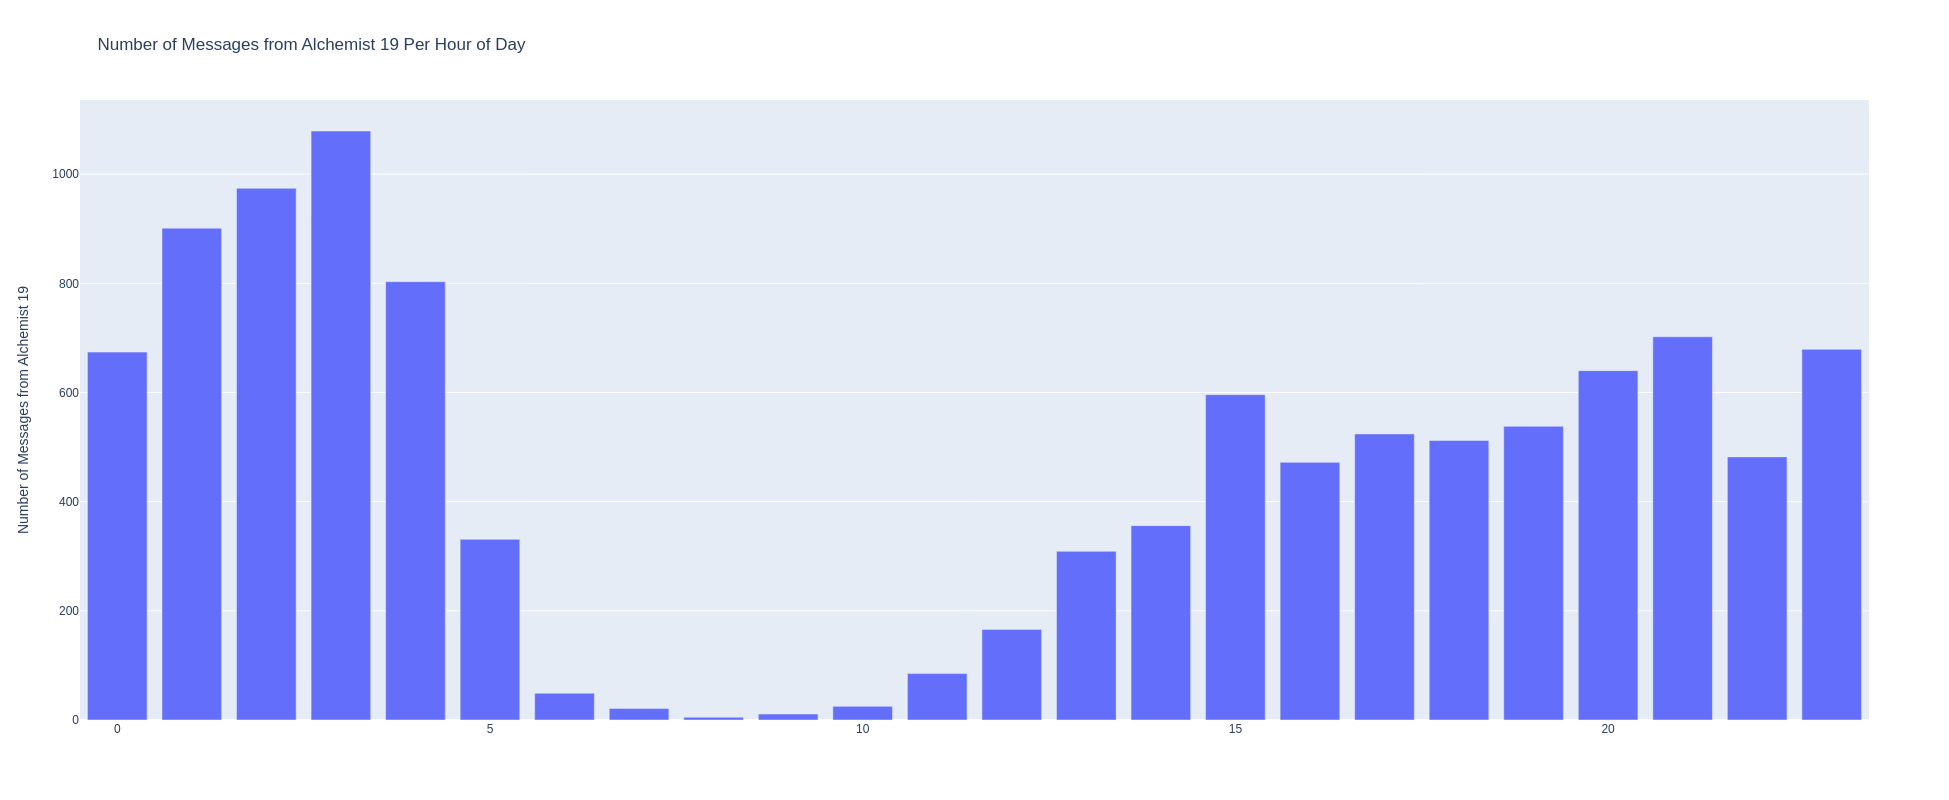

guild_author_messages_day_of_week


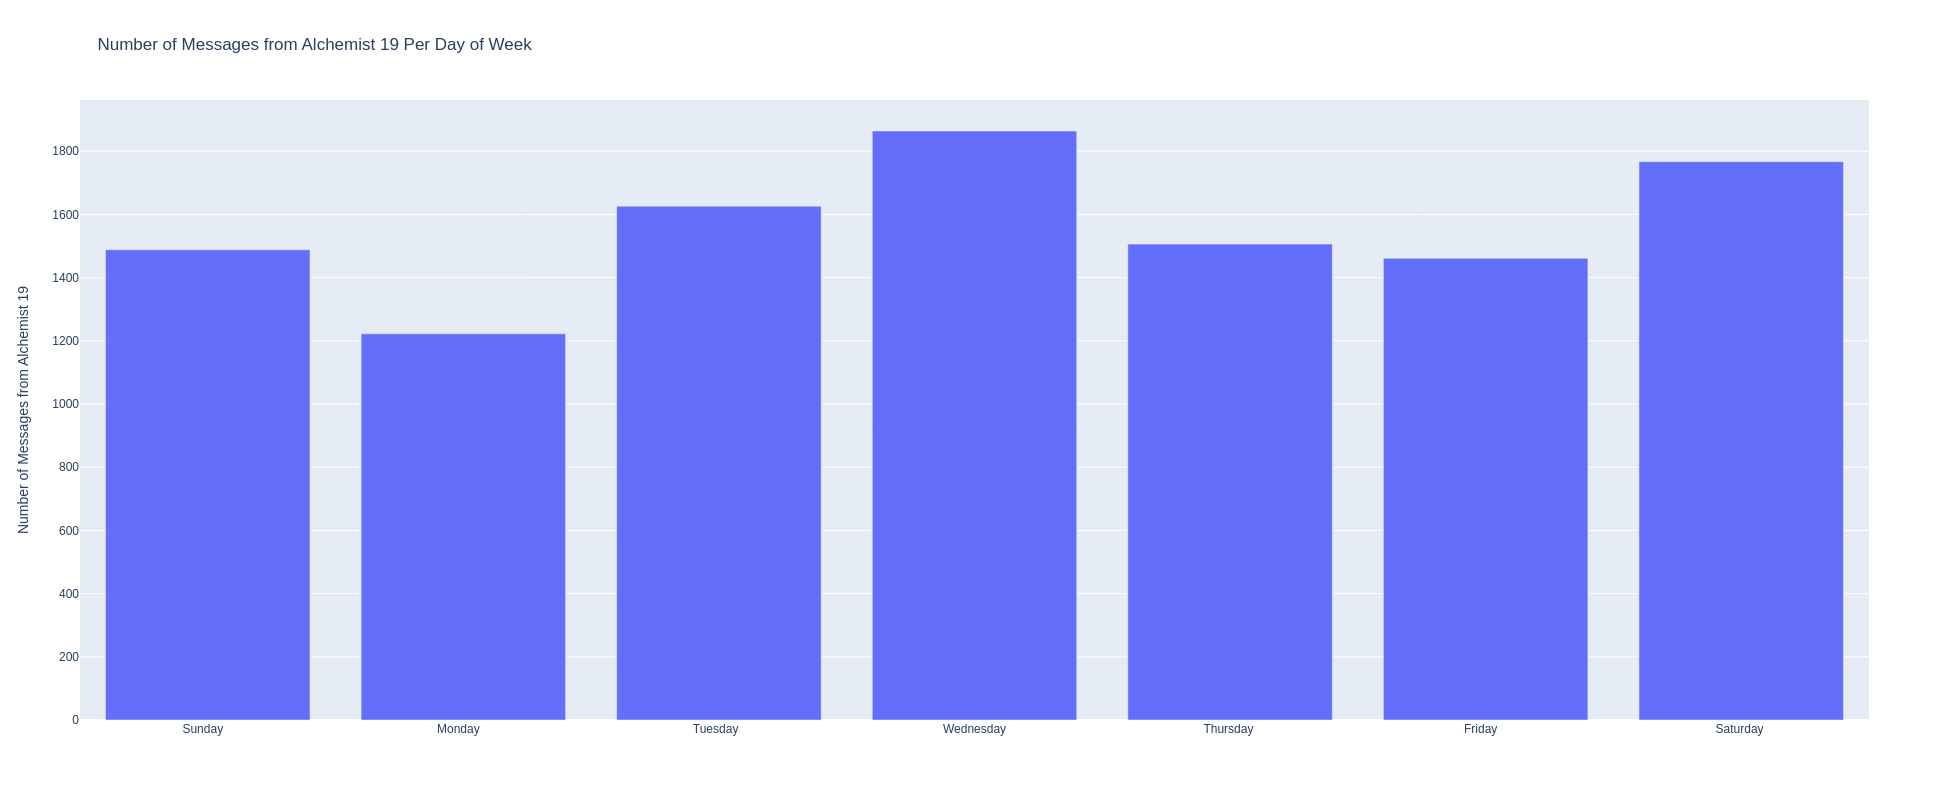

guild_activity_per_month


/home/dentropy/.local/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



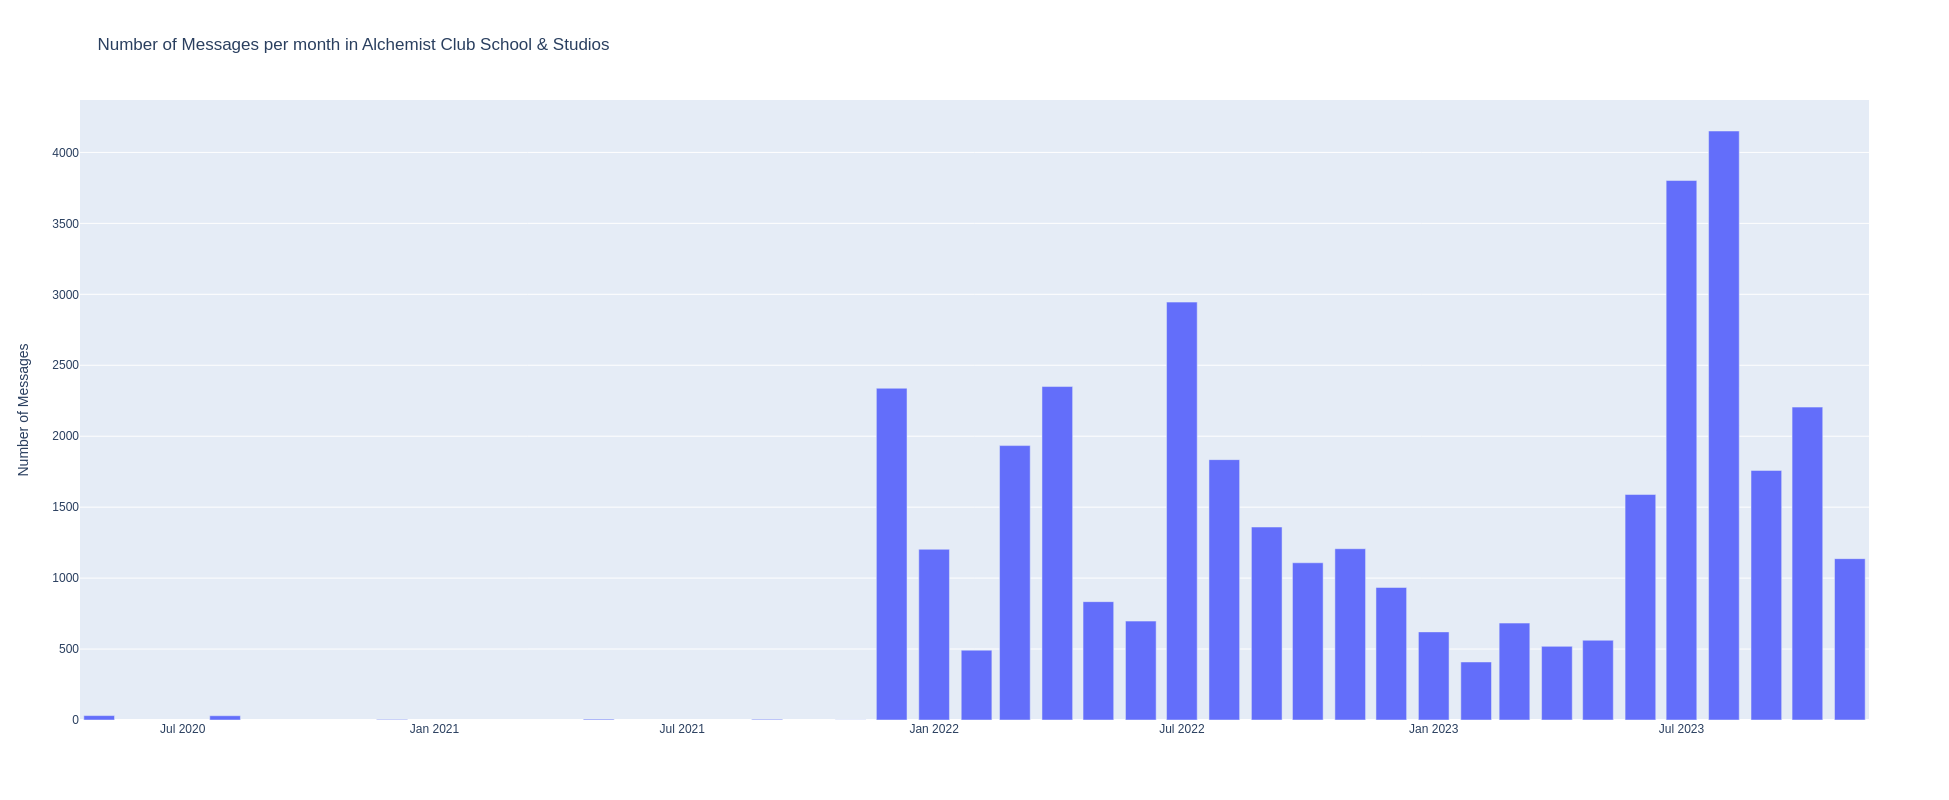

In [5]:
for graph_name in list(graph_names.keys()):#[7:]:
    print(graph_name)
    fig = build_graph(
        cursor,
        graph_name,
        {
            "guild_id" : guild_id,
            "author_id": author_id
        }
    )
    if type(fig) == type("") or fig == None:
        pprint(fig)
    fig["fig"].update_layout(fig["layout"])
    fig["fig"].show()